In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('moore.csv', header=None).values
data.shape

(162, 2)

In [23]:
X = data[:,0].reshape(-1, 1)
Y = data[:,1]

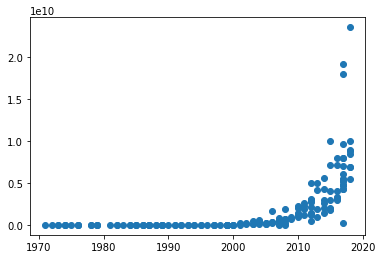

In [24]:
plt.scatter(X, Y)

In [25]:
Y = np.log(Y)

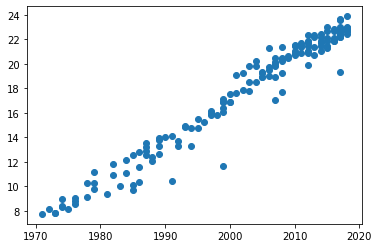

In [26]:
plt.scatter(X, Y)

In [27]:
X = X - X.mean()

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9),
    loss='mse'
)

def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

hist = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 1ms/sample - loss: 422.8704
Epoch 2/200
162/162 [==============================] - 0s 49us/sample - loss: 336.0608
Epoch 3/200
162/162 [==============================] - 0s 49us/sample - loss: 243.2417
Epoch 4/200
162/162 [==============================] - 0s 49us/sample - loss: 188.8297
Epoch 5/200
162/162 [==============================] - 0s 62us/sample - loss: 165.8276
Epoch 6/200
162/162 [==============================] - 0s 68us/sample - loss: 147.5135
Epoch 7/200
162/162 [==============================] - 0s 56us/sample - loss: 109.9399
Epoch 8/200
162/162 [==============================] - 0s 43us/sample - loss: 73.5880
Epoch 9/200
162/162 [==============================] - 0s 43us/sample - loss: 55.8889
Epoch 10/200
162/162 [==============================] - 0s 43us/sample - loss: 35.2585
Epoch 11/200
162/162 [==============================] - 0s 56us/sample - loss: 31.9562
Epoch 12/200
162/162 [===

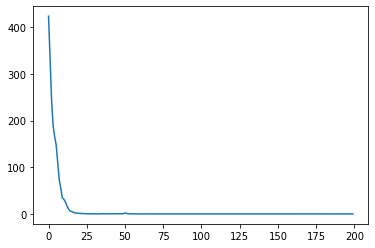

In [29]:
plt.plot(hist.history['loss'], label='loss')

In [30]:
print(model.layers)

In [31]:
print(model.layers[0].get_weights())

[array([[0.33898526]], dtype=float32), array([17.762045], dtype=float32)]


In [32]:
a = model.layers[0].get_weights()[0][0,0]

In [33]:
a

0.33898526

In [34]:
print('Time to double: ', np.log(2)/a)

Time to double:  2.0447708309345733


In [35]:
x = np.array(X).flatten()
y = np.array(Y)
denominator = x.dot(x) - x.mean() * x.sum()
a = (x.dot(y) - y.mean() * y.sum()) / denominator
b = (y.mean() * x.dot(x) - x.mean() * x.dot(y)) / denominator
print(a, b)
print('Time to double:', np.log(2)/a)

-1.3527107481179055 17.764939393631764
Time to double: -0.5124134494564754
